<a href="https://colab.research.google.com/github/asimoya99/Computer-Vision/blob/master/FeatureDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# harris corner detection 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(-0.5, 465.5, 309.5, -0.5)

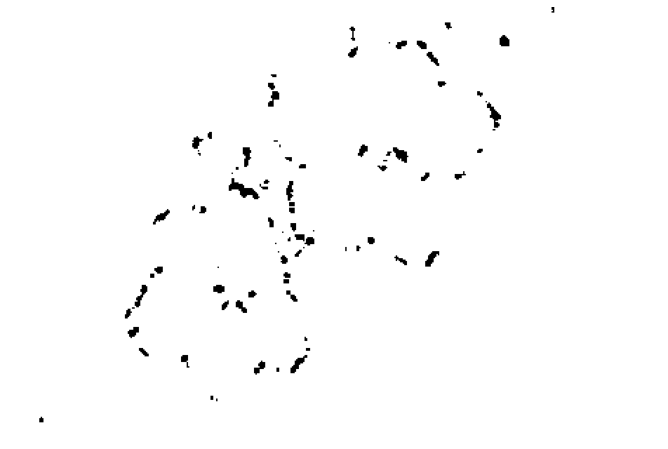

In [6]:
flower = cv2.imread('/content/flower.png')
gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

# harris corner detection 
block_size = 4 # covariance matrix size 
kernel_size = 3 # neighbourhood kernel
k = 0.01 # parameter for harris corner score

# compute harris corner 
corners = cv2.cornerHarris(gray, block_size, kernel_size, k)

# create corner image 
display_corner = np.ones(gray.shape[:2])

display_corner = 255* display_corner

# apply thresholding to the corner score 
thres = 0.01 # more than 1% of max value 
display_corner[corners > thres * corners.max()] = 10 # display pixel value 

# setup display
plt.figure(figsize=(12,8))
plt.imshow(display_corner, cmap='gray')
plt.axis('off')


In [12]:
#FAST Edge detection

def compute_fast_det(file_name, is_nms = True, thresh = 10):
  #reads image from filename and computes fast keypoints 
  img = cv2.imread(file_name)

  # initialize Fast object with the default one 
  fast = cv2.FastFeatureDetector_create()

  # find and draw the keypoints 
  if not is_nms:
    fast.setNonMaxSuppression(0)
  fast.setThreshold(thresh)
  kp = fast.detect(img, None)
  cv2.drawKeypoints(img, kp, img, color = (255,0,0))
  return img


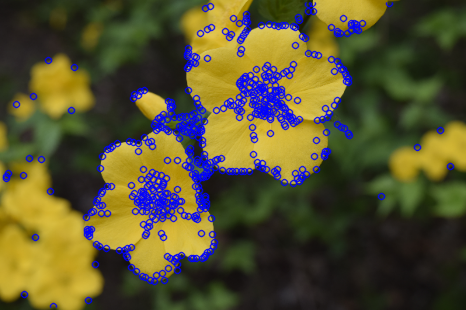

In [14]:
from google.colab.patches import  cv2_imshow

cv2_imshow(compute_fast_det('/content/flower.png'))

In [15]:
#Computing Feature using ORB
orb = cv2.ORB_create()

# set the parameters
orb.setScoreType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)


In [17]:
# detect keypoints 
kp = orb.detect(flower, None)


In [18]:
# compute descriptors for detected keypoints 
kp, des = orb.compute(flower, kp)


In [19]:
def compute_orb_keypoints(filename):
  img = cv2.imread('/content/flower.png')
  orb = cv2.ORB_create()

  # set the parameters
  orb.setScoreType(cv2.FastFeatureDetector_TYPE_9_16)
  # detect keypoints 
  kp = orb.detect(img, None)
  # for the detected keypoints compute descriptors 
  kp, des = orb.compute(img, kp)
  return img, kp, des

In [ ]:
path_to_flower = '/content/flower.png'
compute_orb_keypoints(path_to_flower)

In [32]:
def draw_keyp(img, kp):
  cv2.drawKeypoints(img, kp, img, color = (255,0,0), flags = 2)
  return img

def plot_img(img, figsize = (12,8)):
  # ax, fig = plt.subplots(nrows=1, ncols=1)
  # # fig = plt.figure(figsize= figsize)
  # # ax = fig.add_suplot(1,1,1)
  fig = plt.figure(figsize=figsize)
  ax = fig.add_subplot(1,1,1)

  # image need to be converted to RGB format for plotting 
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

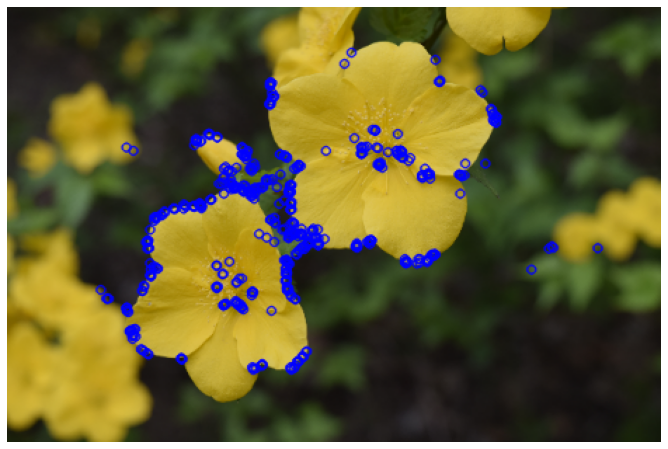

In [33]:
def main():
  # read an image 
  filename = path_to_flower
  #compute the ORB keypoints 
  img1, kp1, des1 = compute_orb_keypoints(filename)
  #draw keypoints on image
  img1 = draw_keyp(img1, kp1)
  # plot image with keypoints 
  plot_img(img1)

if __name__ == '__main__':
  main()
  

In [34]:
#application find your object in an image

#computer orb keypoints 
def compute_orb_keypoints(filename):
  img = cv2.imread('/content/flower.png')
  orb = cv2.ORB_create()

  # set the parameters
  orb.setScoreType(cv2.FastFeatureDetector_TYPE_9_16)
  # detect keypoints 
  kp = orb.detect(img, None)
  # for the detected keypoints compute descriptors 
  kp, des = orb.compute(img, kp)
  return img, kp, des


In [35]:
#match two images in a two-step process
def brute_force_matcher(des1, des2):
  #create BFMatcher object 
  bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck = True)
  # match descriptors 
  matches = bf.match(des1, des2)

  # sort them in the order of their distances 
  matches = sorted(matches, key = lambda x: x.distance)
  return matches

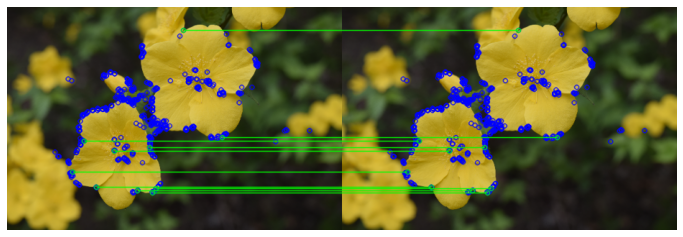

In [41]:
def computer_img_matches(filename1, filename2, thres = 10):
  img1, kp1, des1 = compute_orb_keypoints(filename1)
  img2, kp2, des2 = compute_orb_keypoints(filename2)
  matches = brute_force_matcher(des1, des2)
  draw_matches(img1, img2, kp1, kp2, matches, thres)
  
def draw_matches(img1, img2,kp1,kp2, matches, thres = 10):
  #utility function to draw the lines connecting matches between the two images 
  draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), flags = 0)
  # draw the first thres matches 
  img3 = cv2.drawMatches(img1,kp1,img2, kp2, matches[:thres], None, **draw_params)
  plot_img(img3)
def main():
  # read an image 
  filename1 = '/content/flower.png'
  filename2 = '/content/flower.png'
  computer_img_matches(filename1, filename2)
if __name__ == '__main__':
  main()
